In [2]:
import pandas as pd
df=pd.read_csv('C:\\Users\\sharv\\Downloads\\spam.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
df.columns=['labels','data']

In [6]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(df['labels'])

In [8]:
df['labels']=labels

In [9]:
df.head()

,labels,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
y=labels

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from wordcloud import WordCloud
cv=CountVectorizer(decode_error='ignore')
X=cv.fit_transform(df['data'])

In [14]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.33)

In [15]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
print('Train Accuracy:',model.score(X_train,y_train))
print('Test Accuracy:',model.score(X_test,y_test))

Train Accuracy: 0.993570854540584
Test Accuracy: 0.9782490483958673


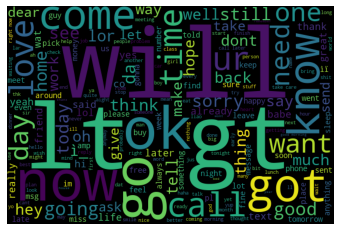

In [16]:
import matplotlib.pyplot as plt
def visualize(label):
    words=''
    for msg in df[df['labels']==label]['data']:
        msg=msg.lower()
        words+=msg+' '
    wordcloud=WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
visualize(0)

In [17]:
df['predictions']=model.predict(X)
sneaky_spam=df[(df['predictions']==0) & (df['labels']==1)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Please CALL 08712402779 immediately as there is an urgent message waiting for you
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
CALL 09090900040 & LISTEN TO EXTREME DIRTY LIVE CHAT GOING ON IN THE OFFICE RIGHT NOW TOTAL PRIVACY NO ONE KNOWS YOUR [sic] LISTENING 60P MIN 24/7MP 0870753331018+
Hi ya babe

In [18]:
not_actually_spam=df[(df['predictions']==1) & (df['labels']==0)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Please CALL 08712402779 immediately as there is an urgent message waiting for you
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
CALL 09090900040 & LISTEN TO EXTREME DIRTY LIVE CHAT GOING ON IN THE OFFICE RIGHT NOW TOTAL PRIVACY NO ONE KNOWS YOUR [sic] LISTENING 60P MIN 24/7MP 0870753331018+
Hi ya babe